# <center>PDL Lab 09: Text Corpus Creation and Classification</center>

### 205229103

### Arzoo Sah

**1.Dataset Creation**

In [1]:
import nltk
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from keras.layers import Dense,Activation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Arzoo
[nltk_data]     Sah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Arzoo
[nltk_data]     Sah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df =pd.read_csv('quotes.csv',encoding='cp1252')

In [3]:
df.shape

(40, 2)

In [4]:
df.head()

,QUOTES,LABELS
0,We become what we think about,1
1,People who are crazy enough to think they can ...,1
2,Optimism is the one quality more associated wi...,1
3,Happiness is not something readymade. It comes...,1
4,All our dreams can come true if we have the co...,1


In [5]:
df.groupby('LABELS').count()

,QUOTES
LABELS,
0,20
1,20


**2.Pre-processing**

In [6]:
X = df.QUOTES
y = df.LABELS

In [7]:
lemmatizer = WordNetLemmatizer()

In [8]:
def clean_review(review):
    tokens = word_tokenize(review)
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    nopunc =[char for char in filtered_tokens if char not in punctuations]
    return " ".join(nopunc)

In [9]:
temp=X.tolist()
fax=[]
for i in temp:
    fax.append(clean_review(i))
n_X=pd.Series(fax)

In [10]:
tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(n_X)
features_name = tfidf.get_feature_names()
text_vect = pd.DataFrame(vectors.todense(),columns=features_name)
text_vect

,accept,accomplishment,action,adjust,affect,afraid,all,always,and,another,...,wish,work,world,worse,would,yesterday,yet,you,your,zone
0,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.371333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.419952,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.429323,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0,0.000000,0.36531,0.00000,0.000000,0.000000,0.328468,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.208517,0.000000,0.302901
9,0.000000,0.0,0.000000,0.00000,0.32489,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


**3.Dataset Preparation**

In [11]:
X_train,X_test,y_train,y_test = train_test_split(text_vect,y,train_size=0.75,test_size=0.25)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30, 153)
(30,)
(10, 153)
(10,)


**4.Model Creation**

**5.Analysis**


#### model with 4 hidden layers

In [13]:
model = Sequential()

model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(2, activation='sigmoid')) #output layer

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               19712     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
____________________________________________________

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])    #compile model

In [15]:
history=model.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)              #fit the model  

Epoch 1/100
2/2 - 1s - loss: 0.6941 - accuracy: 0.3750 - val_loss: 0.6940 - val_accuracy: 0.3333
Epoch 2/100
2/2 - 0s - loss: 0.6854 - accuracy: 0.7917 - val_loss: 0.6962 - val_accuracy: 0.3333
Epoch 3/100
2/2 - 0s - loss: 0.6790 - accuracy: 0.9167 - val_loss: 0.6976 - val_accuracy: 0.3333
Epoch 4/100
2/2 - 0s - loss: 0.6732 - accuracy: 0.9583 - val_loss: 0.6979 - val_accuracy: 0.3333
Epoch 5/100
2/2 - 0s - loss: 0.6669 - accuracy: 0.9583 - val_loss: 0.6986 - val_accuracy: 0.3333
Epoch 6/100
2/2 - 0s - loss: 0.6605 - accuracy: 0.9583 - val_loss: 0.6996 - val_accuracy: 0.3333
Epoch 7/100
2/2 - 0s - loss: 0.6537 - accuracy: 0.9583 - val_loss: 0.7014 - val_accuracy: 0.3333
Epoch 8/100
2/2 - 0s - loss: 0.6451 - accuracy: 0.9583 - val_loss: 0.7042 - val_accuracy: 0.3333
Epoch 9/100
2/2 - 0s - loss: 0.6358 - accuracy: 0.9583 - val_loss: 0.7058 - val_accuracy: 0.3333
Epoch 10/100
2/2 - 0s - loss: 0.6249 - accuracy: 0.9583 - val_loss: 0.7068 - val_accuracy: 0.3333
Epoch 11/100
2/2 - 0s - loss:

Epoch 84/100
2/2 - 0s - loss: 2.3251e-04 - accuracy: 1.0000 - val_loss: 1.0880 - val_accuracy: 0.5000
Epoch 85/100
2/2 - 0s - loss: 2.2845e-04 - accuracy: 1.0000 - val_loss: 1.0896 - val_accuracy: 0.5000
Epoch 86/100
2/2 - 0s - loss: 2.2397e-04 - accuracy: 1.0000 - val_loss: 1.0919 - val_accuracy: 0.5000
Epoch 87/100
2/2 - 0s - loss: 2.1953e-04 - accuracy: 1.0000 - val_loss: 1.0944 - val_accuracy: 0.5000
Epoch 88/100
2/2 - 0s - loss: 2.1548e-04 - accuracy: 1.0000 - val_loss: 1.0974 - val_accuracy: 0.5000
Epoch 89/100
2/2 - 0s - loss: 2.1165e-04 - accuracy: 1.0000 - val_loss: 1.0997 - val_accuracy: 0.5000
Epoch 90/100
2/2 - 0s - loss: 2.0790e-04 - accuracy: 1.0000 - val_loss: 1.1019 - val_accuracy: 0.5000
Epoch 91/100
2/2 - 0s - loss: 2.0419e-04 - accuracy: 1.0000 - val_loss: 1.1040 - val_accuracy: 0.5000
Epoch 92/100
2/2 - 0s - loss: 2.0051e-04 - accuracy: 1.0000 - val_loss: 1.1061 - val_accuracy: 0.5000
Epoch 93/100
2/2 - 0s - loss: 1.9688e-04 - accuracy: 1.0000 - val_loss: 1.1082 - v

In [16]:
model.evaluate(X_test,y_test)           #evaluate model

1/1 [==============================] - 0s 18ms/step - loss: 0.5118 - accuracy: 0.7000


[0.5118415951728821, 0.699999988079071]

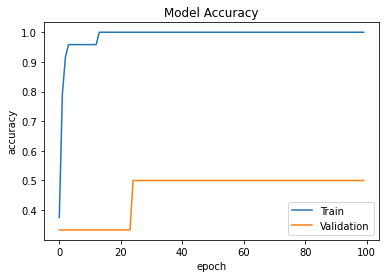

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### model with 2 hidden layer

In [18]:
model1 = Sequential()

model1.add(Dense(1028, activation='relu',input_dim=X_train.shape[1]))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))

model1.add(Dense(2, activation='sigmoid')) #output layer

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1028)              158312    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               526848    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 817,002
Trainable params: 817,002
Non-trainable params: 0
_________________________________________________________________


In [19]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])   #compile model

In [20]:
history1=model1.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)              #fit the model  

Epoch 1/100
2/2 - 1s - loss: 0.6918 - accuracy: 0.4583 - val_loss: 0.7229 - val_accuracy: 0.3333
Epoch 2/100
2/2 - 0s - loss: 0.5979 - accuracy: 0.7500 - val_loss: 0.7575 - val_accuracy: 0.3333
Epoch 3/100
2/2 - 0s - loss: 0.4964 - accuracy: 0.9583 - val_loss: 0.7916 - val_accuracy: 0.3333
Epoch 4/100
2/2 - 0s - loss: 0.3754 - accuracy: 1.0000 - val_loss: 0.8103 - val_accuracy: 0.3333
Epoch 5/100
2/2 - 0s - loss: 0.2432 - accuracy: 1.0000 - val_loss: 0.9094 - val_accuracy: 0.3333
Epoch 6/100
2/2 - 0s - loss: 0.1244 - accuracy: 1.0000 - val_loss: 0.9342 - val_accuracy: 0.3333
Epoch 7/100
2/2 - 0s - loss: 0.0507 - accuracy: 1.0000 - val_loss: 0.9171 - val_accuracy: 0.5000
Epoch 8/100
2/2 - 0s - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.9032 - val_accuracy: 0.6667
Epoch 9/100
2/2 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.9099 - val_accuracy: 0.5000
Epoch 10/100
2/2 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.9330 - val_accuracy: 0.6667
Epoch 11/100
2/2 - 0s - loss:

Epoch 82/100
2/2 - 0s - loss: 1.3411e-07 - accuracy: 1.0000 - val_loss: 1.4108 - val_accuracy: 0.5000
Epoch 83/100
2/2 - 0s - loss: 1.3411e-07 - accuracy: 1.0000 - val_loss: 1.4108 - val_accuracy: 0.5000
Epoch 84/100
2/2 - 0s - loss: 1.3411e-07 - accuracy: 1.0000 - val_loss: 1.4108 - val_accuracy: 0.5000
Epoch 85/100
2/2 - 0s - loss: 1.3411e-07 - accuracy: 1.0000 - val_loss: 1.4108 - val_accuracy: 0.5000
Epoch 86/100
2/2 - 0s - loss: 1.3411e-07 - accuracy: 1.0000 - val_loss: 1.4108 - val_accuracy: 0.5000
Epoch 87/100
2/2 - 0s - loss: 1.3411e-07 - accuracy: 1.0000 - val_loss: 1.4108 - val_accuracy: 0.5000
Epoch 88/100
2/2 - 0s - loss: 1.3411e-07 - accuracy: 1.0000 - val_loss: 1.4108 - val_accuracy: 0.5000
Epoch 89/100
2/2 - 0s - loss: 1.3411e-07 - accuracy: 1.0000 - val_loss: 1.4108 - val_accuracy: 0.5000
Epoch 90/100
2/2 - 0s - loss: 1.3411e-07 - accuracy: 1.0000 - val_loss: 1.4108 - val_accuracy: 0.5000
Epoch 91/100
2/2 - 0s - loss: 1.3411e-07 - accuracy: 1.0000 - val_loss: 1.4109 - v

In [21]:
model1.evaluate(X_test,y_test)         #evaluate model

1/1 [==============================] - 0s 28ms/step - loss: 0.7882 - accuracy: 0.7000


[0.7882274985313416, 0.699999988079071]

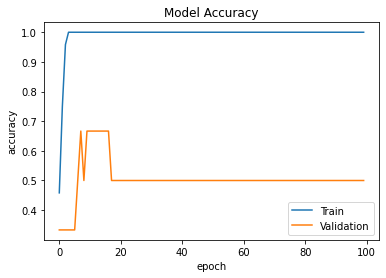

In [22]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

##### model 3 hidden layers 

In [23]:
model2 = Sequential()

model2.add(Dense(512, activation='relu',input_dim=X_train.shape[1]))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))

model2.add(Dense(2, activation='sigmoid')) #output layer

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               78848     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 130       
Total params: 251,458
Trainable params: 251,458
Non-trainable params: 0
_________________________________________________________________


In [24]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  #compile model

In [25]:
history2 = model2.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)              #fit the model  

Epoch 1/100
2/2 - 0s - loss: 0.6951 - accuracy: 0.4167 - val_loss: 0.7105 - val_accuracy: 0.3333
Epoch 2/100
2/2 - 0s - loss: 0.6546 - accuracy: 0.8750 - val_loss: 0.7207 - val_accuracy: 0.3333
Epoch 3/100
2/2 - 0s - loss: 0.6153 - accuracy: 0.9583 - val_loss: 0.7411 - val_accuracy: 0.3333
Epoch 4/100
2/2 - 0s - loss: 0.5659 - accuracy: 1.0000 - val_loss: 0.7731 - val_accuracy: 0.3333
Epoch 5/100
2/2 - 0s - loss: 0.5032 - accuracy: 1.0000 - val_loss: 0.8056 - val_accuracy: 0.3333
Epoch 6/100
2/2 - 0s - loss: 0.4258 - accuracy: 1.0000 - val_loss: 0.8344 - val_accuracy: 0.3333
Epoch 7/100
2/2 - 0s - loss: 0.3355 - accuracy: 1.0000 - val_loss: 0.9029 - val_accuracy: 0.3333
Epoch 8/100
2/2 - 0s - loss: 0.2391 - accuracy: 1.0000 - val_loss: 0.9757 - val_accuracy: 0.3333
Epoch 9/100
2/2 - 0s - loss: 0.1504 - accuracy: 1.0000 - val_loss: 1.0309 - val_accuracy: 0.3333
Epoch 10/100
2/2 - 0s - loss: 0.0819 - accuracy: 1.0000 - val_loss: 1.0603 - val_accuracy: 0.3333
Epoch 11/100
2/2 - 0s - loss:

Epoch 82/100
2/2 - 0s - loss: 1.2318e-06 - accuracy: 1.0000 - val_loss: 1.6427 - val_accuracy: 0.1667
Epoch 83/100
2/2 - 0s - loss: 1.2269e-06 - accuracy: 1.0000 - val_loss: 1.6429 - val_accuracy: 0.1667
Epoch 84/100
2/2 - 0s - loss: 1.2269e-06 - accuracy: 1.0000 - val_loss: 1.6431 - val_accuracy: 0.1667
Epoch 85/100
2/2 - 0s - loss: 1.2269e-06 - accuracy: 1.0000 - val_loss: 1.6433 - val_accuracy: 0.1667
Epoch 86/100
2/2 - 0s - loss: 1.2269e-06 - accuracy: 1.0000 - val_loss: 1.6435 - val_accuracy: 0.1667
Epoch 87/100
2/2 - 0s - loss: 1.2219e-06 - accuracy: 1.0000 - val_loss: 1.6437 - val_accuracy: 0.1667
Epoch 88/100
2/2 - 0s - loss: 1.2219e-06 - accuracy: 1.0000 - val_loss: 1.6440 - val_accuracy: 0.1667
Epoch 89/100
2/2 - 0s - loss: 1.2169e-06 - accuracy: 1.0000 - val_loss: 1.6442 - val_accuracy: 0.1667
Epoch 90/100
2/2 - 0s - loss: 1.2169e-06 - accuracy: 1.0000 - val_loss: 1.6445 - val_accuracy: 0.1667
Epoch 91/100
2/2 - 0s - loss: 1.2120e-06 - accuracy: 1.0000 - val_loss: 1.6447 - v

In [26]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.7238 - accuracy: 0.8000


[0.7237566113471985, 0.800000011920929]

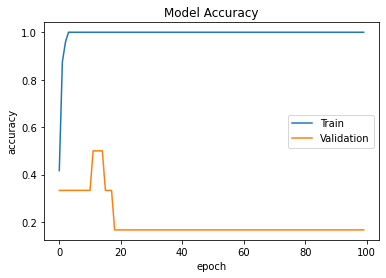

In [27]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### model with 1 hidden layer

In [28]:
model3 = Sequential()

model3.add(Dense(64, activation='relu',input_dim=X_train.shape[1]))
model3.add(Dense(32, activation='relu'))

model3.add(Dense(2, activation='sigmoid')) #output layer

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                9856      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 66        
Total params: 12,002
Trainable params: 12,002
Non-trainable params: 0
_________________________________________________________________


In [29]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])   #compile model

In [30]:
history3 = model3.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)              #fit the model  

Epoch 1/100
2/2 - 1s - loss: 0.7031 - accuracy: 0.4167 - val_loss: 0.6851 - val_accuracy: 0.6667
Epoch 2/100
2/2 - 0s - loss: 0.6848 - accuracy: 0.5833 - val_loss: 0.6888 - val_accuracy: 0.6667
Epoch 3/100
2/2 - 0s - loss: 0.6717 - accuracy: 0.6667 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 4/100
2/2 - 0s - loss: 0.6580 - accuracy: 0.7083 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 5/100
2/2 - 0s - loss: 0.6450 - accuracy: 0.7500 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 6/100
2/2 - 0s - loss: 0.6334 - accuracy: 0.7500 - val_loss: 0.7027 - val_accuracy: 0.5000
Epoch 7/100
2/2 - 0s - loss: 0.6213 - accuracy: 0.8333 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 8/100
2/2 - 0s - loss: 0.6086 - accuracy: 0.8750 - val_loss: 0.7101 - val_accuracy: 0.3333
Epoch 9/100
2/2 - 0s - loss: 0.5962 - accuracy: 0.9167 - val_loss: 0.7141 - val_accuracy: 0.3333
Epoch 10/100
2/2 - 0s - loss: 0.5826 - accuracy: 1.0000 - val_loss: 0.7180 - val_accuracy: 0.3333
Epoch 11/100
2/2 - 0s - loss:

Epoch 85/100
2/2 - 0s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.1009 - val_accuracy: 0.3333
Epoch 86/100
2/2 - 0s - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.1039 - val_accuracy: 0.3333
Epoch 87/100
2/2 - 0s - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.1065 - val_accuracy: 0.3333
Epoch 88/100
2/2 - 0s - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.1087 - val_accuracy: 0.3333
Epoch 89/100
2/2 - 0s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.1103 - val_accuracy: 0.3333
Epoch 90/100
2/2 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.1127 - val_accuracy: 0.3333
Epoch 91/100
2/2 - 0s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.1148 - val_accuracy: 0.3333
Epoch 92/100
2/2 - 0s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.1172 - val_accuracy: 0.3333
Epoch 93/100
2/2 - 0s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.1198 - val_accuracy: 0.3333
Epoch 94/100
2/2 - 0s - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.1226 - val_accuracy: 0.3333
Epoch 95/100
2/2 - 0

In [31]:
model3.evaluate(X_test,y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.7888 - accuracy: 0.7000


[0.7888355255126953, 0.699999988079071]

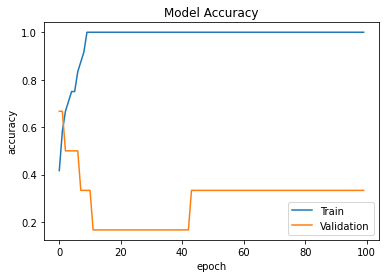

In [32]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()